In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [125]:
df = pd.read_csv("dataframe_preprocess.csv")
df = df.drop(columns=['Unnamed: 0'])

In [126]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day,month_name,month_full_name
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22,Feb,February
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23,Feb,February
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24,Feb,February
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25,Feb,February
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26,Feb,February


## 1. Find the number of Total Vaccinations in India in Year 2020, 2021 and 2022

In [127]:
df_pre = df[df["country"] == "India"]
lst = [2020,2021,2022]
dct = {}
for i in lst:
    df_pr = df_pre[df_pre["year"]==i]
    dct[i]=df_pr["total_vaccinations"].sum()

for i in dct.keys():
    print(f"Total vaccination in India in Year {i} is: { dct[i]}")

Total vaccination in India in Year 2020 is: 0.0
Total vaccination in India in Year 2021 is: 174118546779.0
Total vaccination in India in Year 2022 is: 149321759019.0


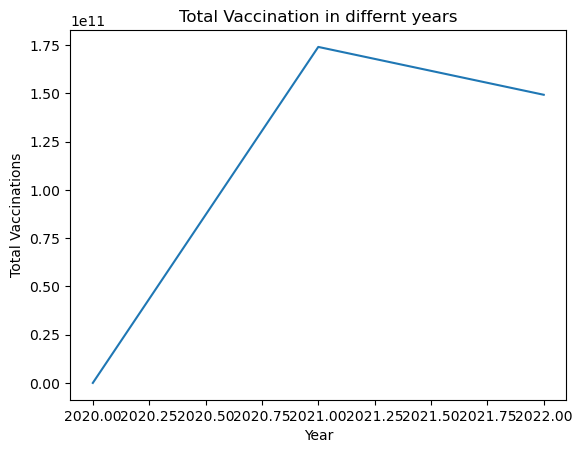

In [128]:
plt.plot(dct.keys(), dct.values())
plt.xlabel('Year')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccination in differnt years')
plt.show()


### 2. Compare number of total vaccinations in year 2020 of India and USA

In [129]:
df_pr = df[df['country'] == 'India']
df_pr = df_pr[df_pr['year'] == 2020]
total_in_ind = int(df_pr['total_vaccinations'].sum())
print(f"Total vaccination in India in Year 2020 is: {total_in_ind}")

df_pr = df[df['year'] == 2020]
df_pr = df_pr[df_pr['country'] == "United States"]
total_in_usa = int(df_pr['total_vaccinations'].sum())
print(f"Total vaccination in United States in Year 2020 is : {total_in_usa} ")

Total vaccination in India in Year 2020 is: 0
Total vaccination in United States in Year 2020 is : 41094416 


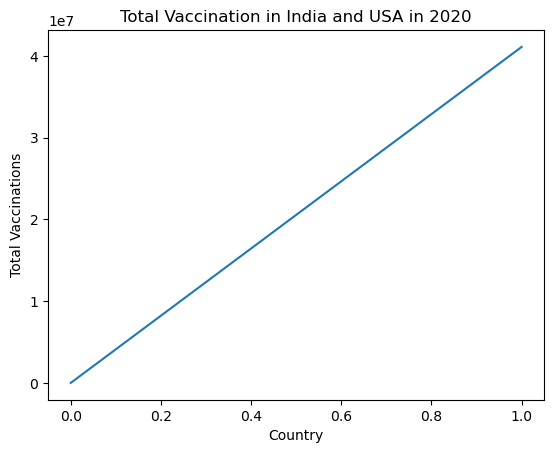

In [130]:
data = []
data.append([total_in_ind,total_in_usa])

plt.plot(data[0])
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccination in India and USA in 2020')
plt.show()

## 3. Compare number of total vaccinations in year 2021 of India and China

In [131]:
dct = {}
df_preprocess = df[df["country"] == "India"]
df_pr = df_preprocess[df_preprocess["year"] == 2021]
dct["India"] = df_pr["total_vaccinations"].sum()

df_preprocess = df[df["country"] == "China"]
df_pr = df_preprocess[df_preprocess["year"] == 2021]
dct["China"] = df_pr["total_vaccinations"].sum()


for i in dct.keys():
    print(f"Total vaccination in {i} in Year 2021 is: { int(dct[i]) }")


Total vaccination in India in Year 2021 is: 174118546779
Total vaccination in China in Year 2021 is: 440076944700


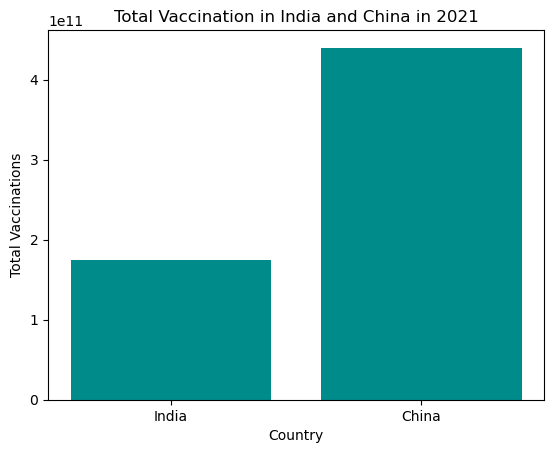

In [132]:
plt.bar(d.keys(),d.values(), color = 'darkcyan')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccination in India and China in 2021')
plt.show()

### 4) Total vaccination in Each Month in India in 2021

In [133]:
df_pr = df[df["country"] == "India"]
df_pr = df_pr[df_pr["year"] == 2021]

df_pr = df_pr.groupby("month_name")["total_vaccinations"].sum()
df_pr

month_name
Apr    3.038130e+09
Aug    1.559347e+10
Dec    4.193492e+10
Feb    2.377621e+08
Jan    2.832321e+07
Jul    1.112970e+10
Jun    7.930055e+09
Mar    1.166007e+09
May    5.432545e+09
Nov    3.416499e+10
Oct    3.029975e+10
Sep    2.316289e+10
Name: total_vaccinations, dtype: float64

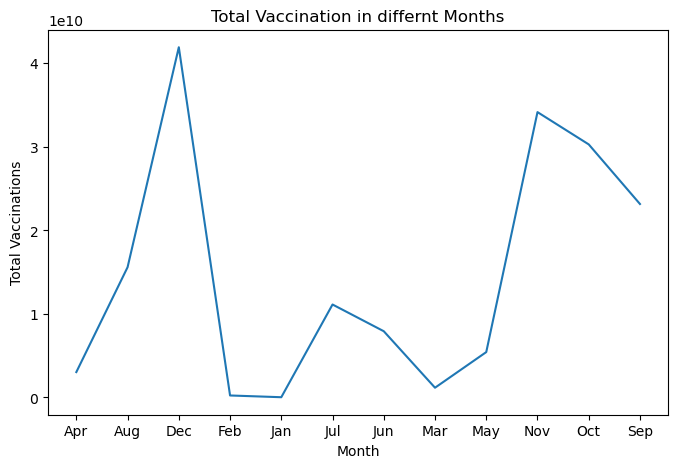

In [134]:
plt.figure(figsize=(8,5))
plt.plot(df_pr)

plt.xlabel('Month')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccination in differnt Months')
plt.show()

### 5) Month having Highest Total vaccination in India in 2021


In [135]:
df_pr = df[df["country"] == "India"]
df_pr = df_pr[df_pr["year"] == 2021]
months = df_pr.groupby("month_full_name")["total_vaccinations"].sum()
print(f'{months.idxmax()} Month having Highest Total vaccination in India in 2021')

December Month having Highest Total vaccination in India in 2021
